In [69]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [70]:
df = pd.read_pickle('../assignment-TL/data/df_bd.pkl')

In [71]:
# Muestra las primeras 5 filas del dataframe
print(df.head())

          x1        x2  x3  x4   x5   x6  Target
0  1525020.0   2.32277  10   7  310  718     1.0
1   274197.0  19.31960   6  21   29  541     1.0
2   169780.0  12.50540   6   1   62  763     1.0
3    17227.8  16.52660   2  14   45  728     1.0
4   437237.0  32.53740   4  23   22  683     1.0


In [72]:
# Calcula el número de filas y columnas del dataframe
print("Shape del dataframe:", df.shape)

Shape del dataframe: (385, 7)


In [73]:
# Muestra el tipo de dato de cada columna
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
x1        float64
x2        float64
x3          int64
x4          int64
x5          int64
x6          int64
Target    float64
dtype: object


In [74]:
# Chequeamos si hay valores faltantes
print("Missing values por Columna:")
print(df.isnull().sum())

Missing values por Columna:
x1        0
x2        0
x3        0
x4        0
x5        0
x6        0
Target    0
dtype: int64


In [75]:
# Muestra las estadísticas básicas de las columnas numéricas
print("Basic statistics of the numerical columns:")
print(df.describe())

Basic statistics of the numerical columns:
                 x1          x2          x3          x4           x5  \
count  3.850000e+02  385.000000  385.000000  385.000000   385.000000   
mean   9.461822e+05   25.798971    5.662338   20.740260    80.337662   
std    1.718188e+06   29.385563    5.395818   31.255501   220.640911   
min    7.021610e+03    0.213802    1.000000    0.000000     4.000000   
25%    1.755010e+05    9.088670    3.000000    4.000000    16.000000   
50%    3.511500e+05   16.644800    5.000000    9.000000    35.000000   
75%    9.127680e+05   29.799900    7.000000   22.000000    70.000000   
max    1.466670e+07  235.558000   63.000000  231.000000  3411.000000   

                x6      Target  
count   385.000000  385.000000  
mean    576.779221    0.787013  
std     192.118238    0.409951  
min      44.000000    0.000000  
25%     467.000000    1.000000  
50%     664.000000    1.000000  
75%     714.000000    1.000000  
max    1147.000000    1.000000  


In [76]:
# Chequea la distribución de la variable target
print("Distribución de la variable target:")
print(df['Target'].value_counts())

Distribución de la variable target:
Target
1.0    303
0.0     82
Name: count, dtype: int64


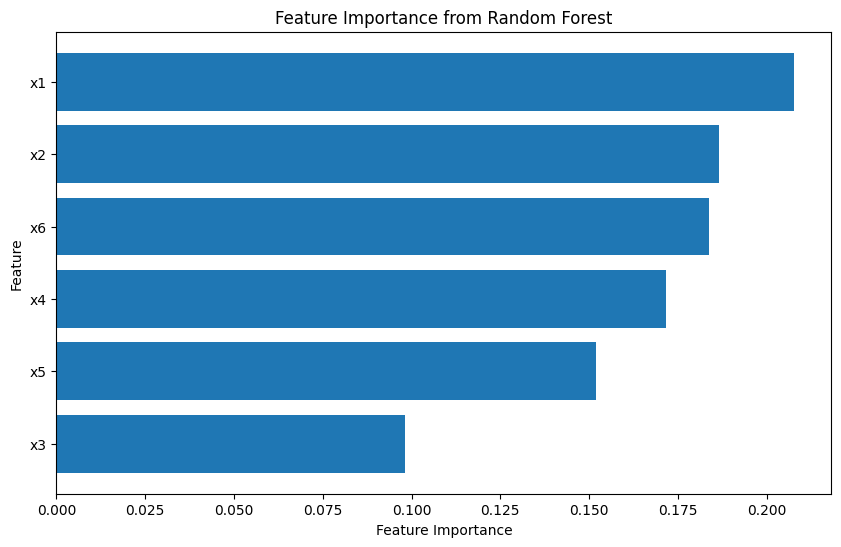

In [77]:
# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_

# Get feature names
feature_names = df.columns[:-1]

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

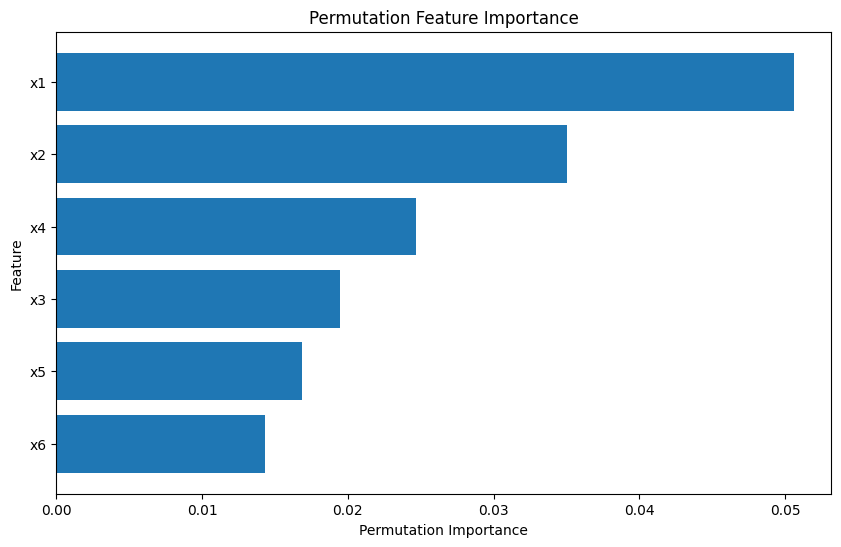

In [78]:
from sklearn.inspection import permutation_importance

# Assuming you have already trained your Random Forest model (rf)

# Calculate permutation feature importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame for visualization
perm_importances = pd.DataFrame({'feature': feature_names, 'importance': result.importances_mean})
perm_importances = perm_importances.sort_values(by='importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importances['feature'], perm_importances['importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [79]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

vif_df = calculate_vif(df.iloc[:, :-1])  # Exclude target column
print(vif_df)

  feature       VIF
0      x1  1.242173
1      x2  1.860930
2      x3  2.597374
3      x4  1.460679
4      x5  1.410494
5      x6  3.352834


In [80]:
df = df.drop(columns=['x3', 'x5', 'x6'])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

Class weights: {0: 2.347560975609756, 1: 0.6353135313531353}


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/20
16/16 [==============================] - 1s 9ms/step - loss: 0.7500 - accuracy: 0.3821 - val_loss: 0.7484 - val_accuracy: 0.5323
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.4675 - val_loss: 0.7358 - val_accuracy: 0.5968
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.5569 - val_loss: 0.7252 - val_accuracy: 0.6129
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.6220 - val_loss: 0.7177 - val_accuracy: 0.6935
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.6545 - val_loss: 0.7120 - val_accuracy: 0.7581
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.7520 - val_loss: 0.7051 - val_accuracy: 0.7581
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.7561 - val_loss: 0.7001 - val_accuracy: 0.7742
Epoch 8/20
16/16 [==

In [96]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities
y_pred_prob = model.predict(X_test)
# Predict classes
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.15      0.11      0.12        19
         1.0       0.73      0.81      0.77        58

    accuracy                           0.64        77
   macro avg       0.44      0.46      0.45        77
weighted avg       0.59      0.64      0.61        77

ROC-AUC Score: 0.4364791288566243
